## Laboratorio 6


In [1]:
import os, cv2
import pandas as pd

Ahora procedmos a hacer una pequeña inspeccion de las familias que se encuentran en las imagenes: 

In [2]:

base_path = './data/'

family_id = 0
id = 0
columns = ['id', 'familyId', 'familyName', 'file', 'path', 'height', 'width']
temp_data = []
for folder in os.listdir(base_path):
  if ('.txt' in folder): continue

  count = 0
  full_path = base_path + folder + '/'
  for file in os.listdir(full_path):
    full_file_path = full_path + file
    img = cv2.imread(full_file_path, cv2.IMREAD_UNCHANGED)
    height, width = img.shape
    temp_data.append([id, family_id, folder, file, full_file_path, height, width])
    count += 1
    id += 1

  print(family_id, 'Family:', folder, '\t\tExamples', count)
  family_id += 1
data = pd.DataFrame(data=temp_data, columns=columns)



0 Family: Adialer.C 		Examples 122
1 Family: Agent.FYI 		Examples 116
2 Family: Allaple.A 		Examples 2949
3 Family: Allaple.L 		Examples 1591
4 Family: Alueron.gen!J 		Examples 198
5 Family: Autorun.K 		Examples 106
6 Family: C2LOP.gen!g 		Examples 200
7 Family: C2LOP.P 		Examples 146
8 Family: Dialplatform.B 		Examples 177
9 Family: Dontovo.A 		Examples 162
10 Family: Fakerean 		Examples 381
11 Family: Instantaccess 		Examples 431
12 Family: Lolyda.AA1 		Examples 213
13 Family: Lolyda.AA2 		Examples 184
14 Family: Lolyda.AA3 		Examples 123
15 Family: Lolyda.AT 		Examples 159
16 Family: Malex.gen!J 		Examples 136
17 Family: Obfuscator.AD 		Examples 142
18 Family: Rbot!gen 		Examples 158
19 Family: Skintrim.N 		Examples 80
20 Family: Swizzor.gen!E 		Examples 128
21 Family: Swizzor.gen!I 		Examples 132
22 Family: VB.AT 		Examples 408
23 Family: Wintrim.BX 		Examples 97
24 Family: Yuner.A 		Examples 800


Vemos que se encontraron 24 tipos de familias y cada familia con una cantidad diferentes de ejemplares y como se puede ver, hay algunas familias que cuentan con dos veces mas el promedio de las demas, pero si no se encuentran valores que sean muy bajos, por lo que no seria pertinente quitarlos. 

Entonces, ahora se creara el csv con el que se estara trabajando: 


In [3]:
df = pd.DataFrame(data=temp_data, columns=columns)
df.to_csv('./data.csv', index=False, encoding='utf8')

Con esto ya podemos trabajar sobre el csv final.

In [4]:
import pandas as pd
import numpy as np
import cv2


In [5]:
data = pd.read_csv('./data.csv', encoding='utf8')
data.describe()

id     familyId       height        width
count  9339.000000  9339.000000  9339.000000  9339.000000
mean   4669.000000     8.513117   436.814541   334.171967
std    2696.081416     7.886885   203.640501   218.421689
min       0.000000     0.000000   208.000000    64.000000
25%    2334.500000     2.000000   281.000000   128.000000
50%    4669.000000     3.000000   424.000000   256.000000
75%    7003.500000    14.000000   467.000000   512.000000
max    9338.000000    24.000000  5334.000000  1024.000000

Podemos ahora empezar a mostrar cierta parte de las imagenes que se enceutran en el csv:

In [6]:
DIMENSION = 256
IMG_SIZE = (DIMENSION, DIMENSION)

def getImages(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, IMG_SIZE)
  return np.array(image, dtype='float32')

data['image'] = data['path'].apply(getImages)
data['image'].head()

0    [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
1    [[[59.0, 59.0, 59.0], [50.0, 50.0, 50.0], [6.0...
2    [[[58.0, 58.0, 58.0], [50.0, 50.0, 50.0], [6.0...
3    [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
4    [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
Name: image, dtype: object

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

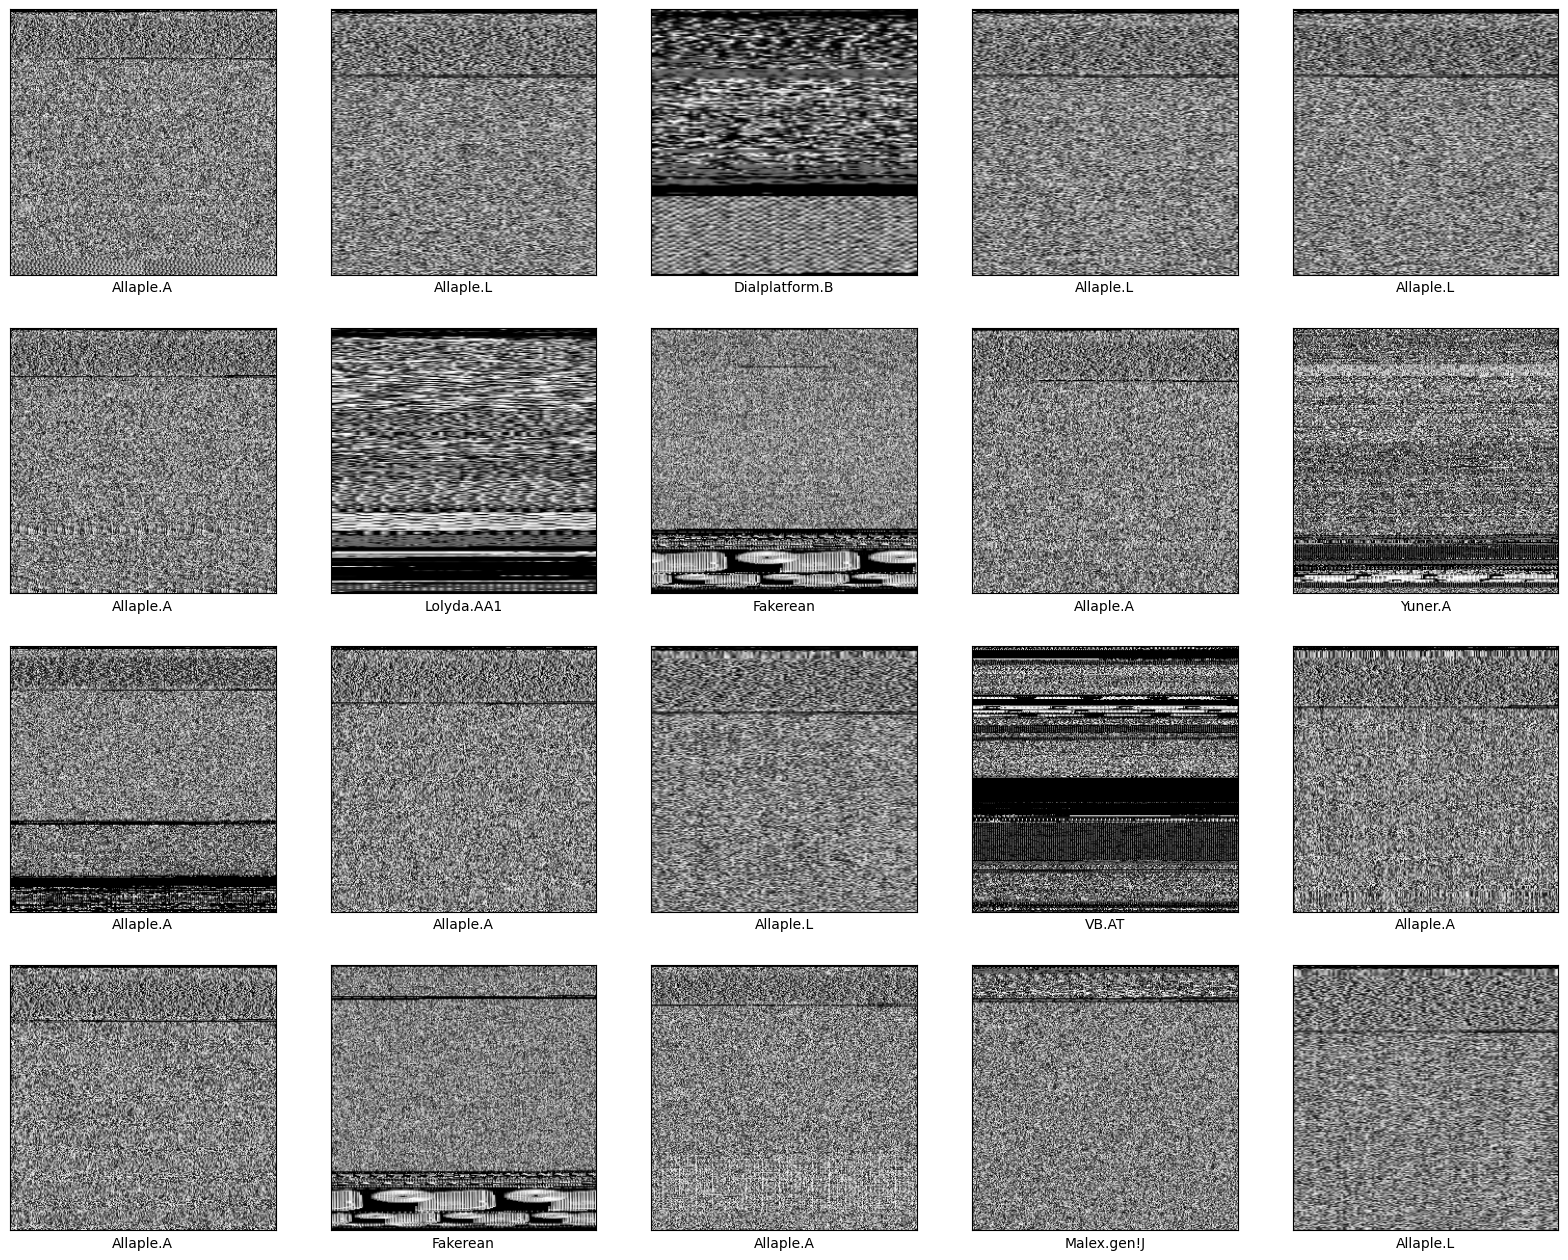

In [8]:
to_show = data.sample(20)

fig_size = (20, 20)
fig = plt.figure(figsize=fig_size)

id = 0
for index, row in to_show.iterrows():
  plt.subplot(5, 5, id + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(row['image'].astype(np.uint8))
  plt.xlabel(row['familyName'])
  id += 1

plt.show()

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
img_height, img_width = 64, 64
batch_size = 128
epochs = 80

In [11]:
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory('data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
class_indices = data_generator.class_indices
num_classes = len(class_indices)


Found 9339 images belonging to 25 classes.


In [12]:
# Division de datos en entrenamiento y prueba

X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Creación del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [14]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [15]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/80
1/1 [==============================] - 1s 825ms/step - loss: 3.2604 - accuracy: 0.0562 - val_loss: 2.7662 - val_accuracy: 0.3590
Epoch 2/80
1/1 [==============================] - 0s 232ms/step - loss: 2.8723 - accuracy: 0.2809 - val_loss: 2.4809 - val_accuracy: 0.3590
Epoch 3/80
1/1 [==============================] - 0s 226ms/step - loss: 2.6831 - accuracy: 0.2472 - val_loss: 2.5700 - val_accuracy: 0.3590
Epoch 4/80
1/1 [==============================] - 0s 213ms/step - loss: 2.7649 - accuracy: 0.2921 - val_loss: 2.6235 - val_accuracy: 0.1026
Epoch 5/80
1/1 [==============================] - 0s 218ms/step - loss: 2.7215 - accuracy: 0.2247 - val_loss: 2.6414 - val_accuracy: 0.1026
Epoch 6/80
1/1 [==============================] - 0s 212ms/step - loss: 2.5812 - accuracy: 0.2135 - val_loss: 2.6235 - val_accuracy: 0.3590
Epoch 7/80
1/1 [==============================] - 0s 216ms/step - loss: 2.6236 - accuracy: 0.2360 - val_loss: 2.5699 - val_accuracy: 0.3590
Epoch 8/80
1/1 [====

In [16]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 8ms/step - loss: 1.6391 - accuracy: 0.6154
Loss: 1.6391, Accuracy: 0.6154


In [17]:
# Métricas del modelo
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
unique_labels = np.unique(y_true)
unique_class_names = [list(class_indices.keys())[i] for i in unique_labels]
print(classification_report(y_true, y_pred, labels=unique_labels, target_names=unique_class_names))
print(confusion_matrix(y_true, y_pred, labels=unique_labels))

2/2 [==============================] - 0s 6ms/step
                precision    recall  f1-score   support

     Allaple.A       0.76      0.93      0.84        14
     Allaple.L       0.40      0.50      0.44         4
 Alueron.gen!J       0.00      0.00      0.00         1
       C2LOP.P       0.00      0.00      0.00         1
Dialplatform.B       1.00      1.00      1.00         1
     Dontovo.A       0.00      0.00      0.00         1
      Fakerean       1.00      1.00      1.00         1
 Instantaccess       1.00      1.00      1.00         1
    Lolyda.AA2       0.00      0.00      0.00         2
    Lolyda.AA3       0.00      0.00      0.00         1
     Lolyda.AT       0.00      0.00      0.00         2
      Rbot!gen       0.00      0.00      0.00         1
    Skintrim.N       0.00      0.00      0.00         1
 Swizzor.gen!E       0.00      0.00      0.00         1
         VB.AT       0.25      0.50      0.33         2
       Yuner.A       1.00      1.00      1.00       

c:\users\randy\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\randy\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\randy\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Discucion

El accuracy que obtuvimos fue de 0.6154, una de las razones por las que se piensa que fue 
así es porque lo trabajamos en modelos juntos y no uno por uno, independiente por cada 
imagen, de manera que no se pierda calidad e informacion valiosa, tambien se piensa que 
afectó el redimensionamiento de las imagenes ya que se adaptan a una tamaño en especifico. 